In [26]:
from sklearn.datasets import make_classification
import numpy as np
x,y = make_classification(n_samples = 100, n_features = 2, n_informative = 1, n_redundant = 0, n_classes = 2, n_clusters_per_class = 1, random_state = 41, hypercube = False, class_sep = 20 )

In [27]:
import matplotlib.pyplot as plt

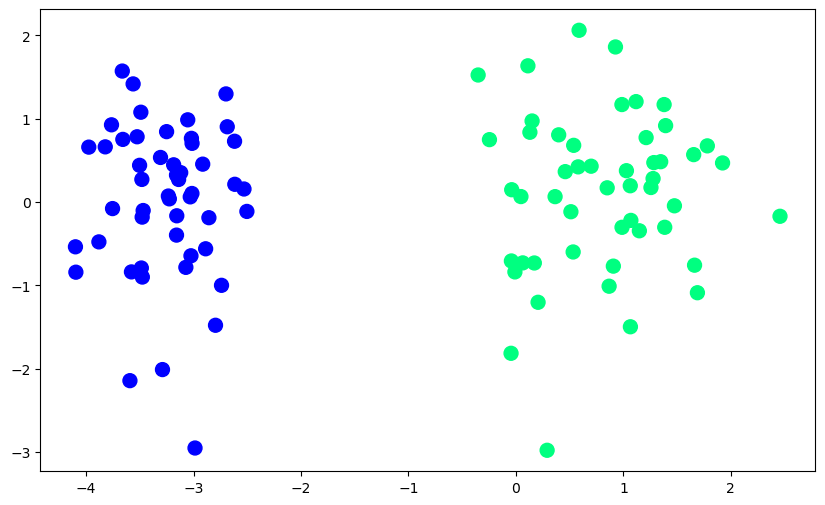

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [29]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(x,y)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [30]:
print(lor.coef_)
print(lor.intercept_)

[[4.83712892 0.21450122]]
[5.82290419]


In [31]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [32]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [39]:
def gd(x,y):
    x = np.insert(x,0,1,axis = 1)
    weights = np.ones(x.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(x,weights))
        weights += lr*(np.dot((y - y_hat),x)/x.shape[0])
        
    return weights[1:],weights[0]
        

In [40]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [41]:
coef_,intercept_ = gd(x,y)

In [42]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [43]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

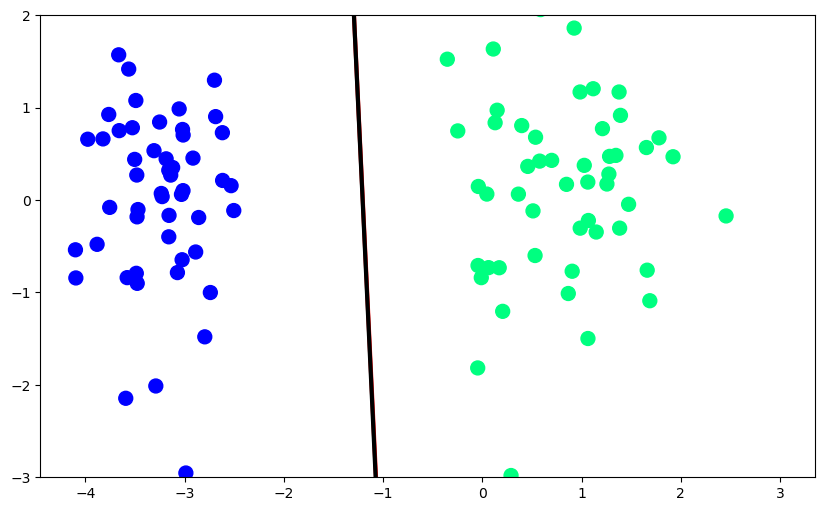

In [44]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)